# **Интенсив по машинному обучению в Сбербанке - финальный проект**

**Скажи мне, на что ты тратишь деньги, и я скажу тебе, сколько тебе лет**

Анализ обезличенных банковских транзакций клиентов Сбербанка.

Ссылка на соревнование: https://ods.ai/competitions/sberbank-sirius-lesson

## **Определяем возраст по тратам** 
## Можно ли узнать возраст клиента на основе информации о его расходах по карте? 

Сбербанк подготовил задачу на базе реальных банковских транзакций. Совершенствуя свои продукты, банк использует информацию о пользователях, в том числе возраст. Это помогает сделать персонализированные продукты, которые удовлетворяют реальным потребностям клиентов. 

**В этом задании вам предстоит определить, есть ли разница в характере и типах трат между клиентами банка разных возрастов.**

![](https://storage.yandexcloud.net/datasouls-competitions/sirius/pic/1_2.png)

## **Исследовательский анализ данных**

Ваша задача — исследовать информацию о расходах клиента банка и выяснить, по какой информации из транзакций - сумма транзакции, время транзакции, категория трат транзакиции или что-то еще - можно отличить клиентов банка разных возрастных категорий. Для этого вам нужно провести исследовательский анализ данных и выяснить, в чем же заключаются различия между тратами с карты у людей разного возраста.


## **Данные**

Для решения задачи вам предоставляется информация о транзакциях клиентов банка. Объемом около 27 000 000 миллионов записей.

Каждая запись описывает одну банковскую транзакцию. 
![](https://storage.yandexcloud.net/datasouls-competitions/sirius/pic/1_5.png)

Вам предоставлен обучающий датасет (набор данных) ```transactions_train.csv```, в котором для каждой транзакции известна дата, сумма, тип и id клиента:
- ```сlient_id``` – уникальный номер клиента;
- ```trans_date``` – дата транзакции (представляет из себя просто номер дня в хронологическом порядке, начиная от заданной даты);
- ```small_group``` – группа транзакций, характеризующих тип транзакции (например, продуктовые магазины, одежда, заправки, детские товары и т.п.);
- ```amount_rur``` – сумма транзакции (для анонимизации данные суммы были трансформированы без потери структуры).

На базе этого файла можно строить различные признаки, которые характеризуют возрастные группы.

Целевая переменная для обучающего датасета находится в файле ```train_target.csv```. В нем содержится информация о Клиенте и метка возрастной группы, к которой он относится:

- ```client_id``` – уникальный номер Клиента (соответствует client_id из файла transactions_train.csv);
- ```bins``` – метка возраста. В файлe test.csv вам надо предсказать для указанных client_id соответствующую метку группы возраста

Вам также предоставлен информационный файл ```small_group_description.csv```, который содержит расшифровку типов транзакций.

## **Рекодмендуем материалы к ознакомлению** 
По ссылкам ниже вы можете найти презентацию с графиками и кодом отличного исследовательского анализа данных от одного из ведущих российских экспертов в области анализа данных Александра Дьяконова
- пост с кодом: https://dyakonov.org/2016/10/14/data-science-contest-сбербанка/ 
- презентация из поста графика: https://alexanderdyakonov.files.wordpress.com/2016/10/dj2016_sdsj_vis.pdf

Презентация по ссылке выше крайне рекомендуется к ознакомлению. Так вы лучше поймете, какие зависимости/срезы/графики нужно строить в финальном задании.

Условно можете считать, что если вы сможете построить большинство графиков из презентации Александра Дьяконова, то это уже будет оценка "отлично".

## **(Раздел со звездочкой) Продвинутые задания с применением машинного обучения**
Для тех, кто хочет пойти дальше исследовательского анализа данных и кому захочется обучить алгоритмы машинного обучения, есть доплонительное задание

**Важно:** для получения максимальной оценки за финальный проект достаточно хорошо выполнить часть с исследовательским анализом данных. Часть с машинным обучением не является обязательной.Текст, выделенный полужирным шрифтом

Задача анализа транзакций представляет из себя мультиклассовую классификацию (4 класса – от 0 до 3). Качество решения считается как доля верно угаданных меток возраста по всем тестовым примерам - **accuracy**.

Ниже приведен пример рассчета метрики accuracy. Такая матрица называется матрицей ошибок (confusion matrix)

![](https://storage.yandexcloud.net/datasouls-competitions/sirius/pic/1_3.png)

Для тех, кто решится взяться за часть с машинным обучением, есть ноутбук ```baseline.ipynb```, где реализован пайплайн машинного обучения на примере обучения модели градиентного бустинга для многоклассовой классификации. Можете смело им пользоваться


### Часть 1 - скачиваем данные


In [1]:
import os

# создаем папку data
os.mkdir('data')
os.listdir()

['.config', 'data', 'sample_data']

In [2]:
# скачиваем архив с данными
!wget https://storage.yandexcloud.net/datasouls-competitions/sirius/data.zip 

--2021-06-11 12:04:02--  https://storage.yandexcloud.net/datasouls-competitions/sirius/data.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251394334 (240M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 239.75M  20.1MB/s    in 13s     

2021-06-11 12:04:16 (18.5 MB/s) - ‘data.zip’ saved [251394334/251394334]



In [3]:
# разархивируем данные
!unzip data.zip -d './data'

Archive:  data.zip
  inflating: ./data/test.csv         
   creating: ./data/__MACOSX/
  inflating: ./data/__MACOSX/._test.csv  
  inflating: ./data/small_group_description.csv  
  inflating: ./data/__MACOSX/._small_group_description.csv  
  inflating: ./data/train_target.csv  
  inflating: ./data/__MACOSX/._train_target.csv  
  inflating: ./data/transactions_train.csv  
  inflating: ./data/__MACOSX/._transactions_train.csv  
  inflating: ./data/transactions_test.csv  
  inflating: ./data/__MACOSX/._transactions_test.csv  


### Часть 2 - вы выполняете исследовательский анализ данных

Вот примерный набор вопросов, на которые стоит ответить с помощью анализа данных:
- как меняется число и сумма странзакций в разных возрастных категориях клиентов по дням месяца, по дням недели?
- какая средняя сумма трат по возрастным группам за месяц?
- есть ли разница в среднем размере снимаемой в банкомате сумме для разных возрастных групп?
- какие самые частые по числу транзакций и самые большие по ссумме покупок категории трат (```mcc_code```) для разных возрастных групп?
- есть ли характерные категории трат для разных возрастных групп?

И это лишь примерый список вопросов. Вы можете провести гораздо более широкий исследовательский анализ данных.

In [4]:
os.listdir('./data')

['small_group_description.csv',
 'train_target.csv',
 'transactions_train.csv',
 'test.csv',
 'transactions_test.csv',
 '__MACOSX']

Считаем файл с транзакциями

In [5]:
import pandas as pd
df_transactions = pd.read_csv('./data/transactions_train.csv')
df_transactions.head(10)

,client_id,trans_date,small_group,amount_rur
0,33172,6,4,71.463
1,33172,6,35,45.017
2,33172,8,11,13.887
3,33172,9,11,15.983
4,33172,10,11,21.341
5,33172,11,11,17.941
6,33172,12,11,17.726
7,33172,13,18,47.397
8,33172,13,1,220.009
9,33172,13,11,9.067


In [6]:
codes = pd.read_csv('./data/small_group_description.csv')
codes.head()

,small_group,small_group_code
0,Зоотовары,0
1,Сетевые супермаркеты и продуктовые магазины,1
2,Обслуживание существующего автомобиля (АЗС),2
3,Оплата телефона и связи,3
4,Аптеки,4


**Фильтрация по условию**

Хотим отобрать транзакции, которые сделаны в 9-й день в категории "Аптеки" (код 4)

In [7]:
bool_mask = (df_transactions['trans_date'] == 9) & (df_transactions['small_group'] == 4)
df_transactions[bool_mask]

,client_id,trans_date,small_group,amount_rur
33621,38624,9,4,1.574
51916,18792,9,4,22.715
63474,29994,9,4,12.723
72464,49816,9,4,40.410
120016,31099,9,4,59.171
...,...,...,...,...
26196758,15202,9,4,10.991
26212348,43721,9,4,10.695
26219634,24450,9,4,5.587
26233845,39792,9,4,7.785


Хотим оставить только транзакции, сумма которых больше 100 рублей

In [8]:
df_transactions[df_transactions['amount_rur'] >= 100]

,client_id,trans_date,small_group,amount_rur
8,33172,13,1,220.009
31,33172,34,40,242.898
35,33172,37,9,285.893
40,33172,41,24,263.941
48,33172,49,9,340.625
...,...,...,...,...
26450063,43300,412,1,184.611
26450072,43300,419,1,185.064
26450282,43300,540,54,232.458
26450307,43300,562,26,107.665


# Учимся отвечать на базовые вопросы по данным
- какие столбцы (признаки) есть в таблице?
- сколько объектов в таблице?
- сколько уникальных значений в каждом столбце?

# Учимся отвечать на бизнес-вопросы по данным
- За сколько дней в таблице представлены данные?
- Какая средняя сумма транзакции?
- Какая средняя сумма транзакции в каждой категории?
- какое количество транзакций в каждм дне?

Далее вам даны примеры вопросов (некоторые сразу с решением)

- Какая средняя сумма транзакции?

- Какая средняя сумма транзакции в категории "Аптеки" (код 4)?

- Какая средняя сумма транзакции в каждой категории?

Для этого используйте метод groupby

 - Постройте график числа транзакций по дням

 - Постройте гистограмму распределения суммы транзакций

In [151]:
#какие столбцы (признаки) есть в таблице?
df_transactions.columns

Index(['client_id', 'trans_date', 'small_group', 'amount_rur'], dtype='object')

In [152]:
#сколько объектов в таблице?
df_transactions.shape

(26450577, 4)

In [156]:
#сколько уникальных значений в каждом столбце?
df_transactions["client_id"].nunique()


30000

In [157]:
df_transactions["trans_date"].nunique()

730

In [158]:
df_transactions["small_group"].nunique()

202

In [159]:
df_transactions["amount_rur"].nunique()

503945

In [161]:
#За сколько дней в таблице представлены данные?
df_transactions["trans_date"].max()

729

In [168]:
#Какая средняя сумма транзакции?
df_transactions["amount_rur"].mean()

55.862152361917445

In [172]:
#Какая средняя сумма транзакции в каждой категории?
df_transactions.groupby("small_group")["amount_rur"].mean()

small_group
0       43.634181
1       41.666898
2       57.532662
3       19.819042
4       34.616480
          ...    
198    339.253889
199     45.795000
200    126.484000
202     72.919500
203     68.968000
Name: amount_rur, Length: 202, dtype: float64

In [173]:
#какое количество транзакций в каждм дне?
df_transactions.groupby("trans_date")["amount_rur"].count()

trans_date
0      13114
1      21716
2      23317
3      23658
4      24050
       ...  
725    49452
726    50789
727    52330
728    49675
729    39019
Name: amount_rur, Length: 730, dtype: int64

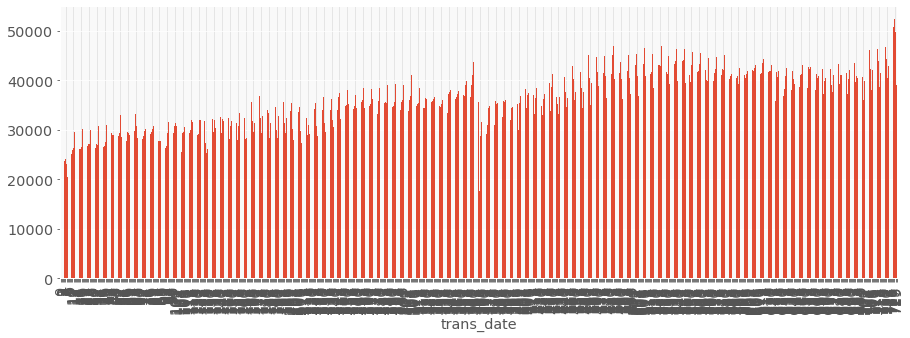

In [176]:
#Постройте график числа транзакций по дням
e=df_transactions.groupby("trans_date")["amount_rur"].count()
e.plot.bar()

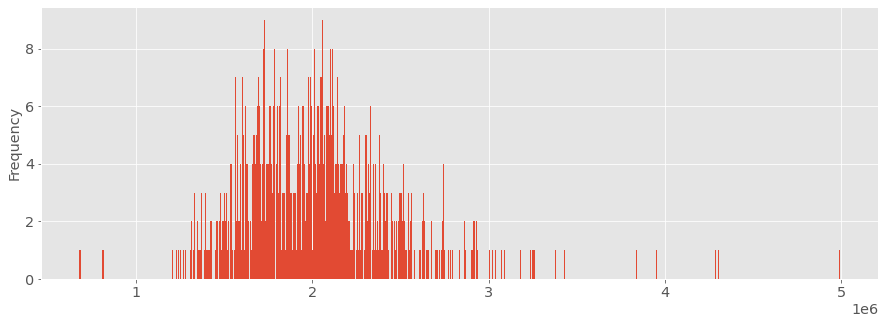

In [186]:
u=df_transactions.groupby("trans_date")["amount_rur"].sum()

u.plot.hist(bins = df_transactions["trans_date"].max())
#Постройте гистограмму распределения суммы транзакций

# Задание (5 баллов)
Постройтие график топ-10 категорий
- по общей сумме трат
- по срендему чеку
- по числу транзакций

Ось ОХ должна быть подписана названиями категорий, а не просто кодами категорий!

- groupby по small_group
- суммируем amount_rur
- сделать сортировку
- взять топ-10
- сделать join (merge) для присвоения названий категориям
- построить график типа bar

In [112]:
# агрегируем сумму денег по категориям
a=df_transactions.groupby("small_group")["amount_rur"].sum().sort_values(ascending = False).head(10)
a

small_group
1     3.388091e+08
24    9.138056e+07
11    6.834635e+07
5     6.527740e+07
2     5.226313e+07
18    5.076317e+07
3     4.814014e+07
9     4.440053e+07
4     4.180300e+07
28    3.695206e+07
Name: amount_rur, dtype: float64

In [113]:
# мерджим (pd.merge()) с расшифровкой кодов
s=pd.merge(a, codes, how = "inner", left_on="small_group", right_on = "small_group_code")
s

,amount_rur,small_group,small_group_code
0,3.388091e+08,Сетевые супермаркеты и продуктовые магазины,1
1,9.138056e+07,Одежда,24
2,6.834635e+07,Фастфуд и кафе,11
3,6.527740e+07,Авиабилеты,5
4,5.226313e+07,Обслуживание существующего автомобиля (АЗС),2
5,5.076317e+07,Рестораны и кафе,18
6,4.814014e+07,Оплата телефона и связи,3
7,4.440053e+07,Универсальные товары,9
8,4.180300e+07,Аптеки,4
9,3.695206e+07,Бытовая техника; компьютерная техника; мобильн...,28


In [84]:
# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

pylab.rcParams.update(params)

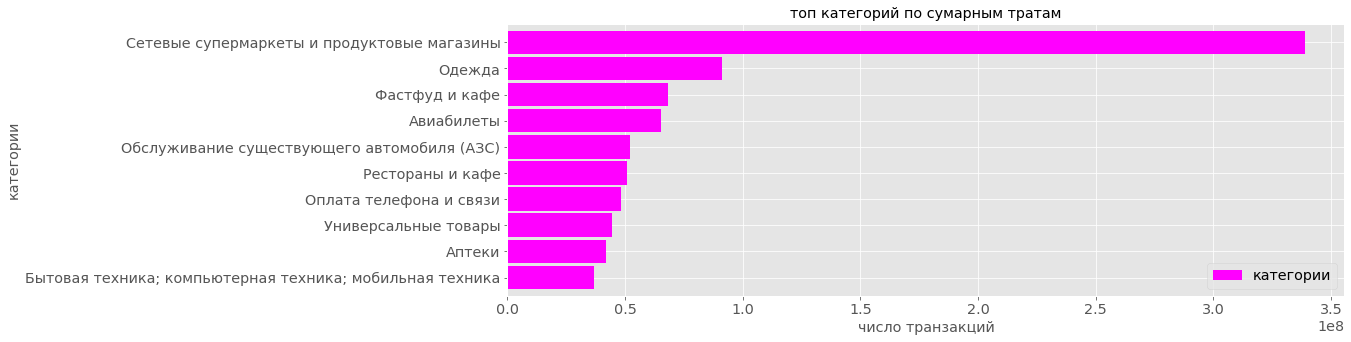

In [149]:
#s.head(10).plot.barh('small_group', 'amount_rur');
dbf = s.head(10).plot.barh('small_group', 'amount_rur',color='magenta', width=0.9)
plt.xlabel('число транзакций')
plt.ylabel('категории')
plt.title('топ категорий по сумарным тратам')
plt.legend(['категории'])
dbf.invert_yaxis()

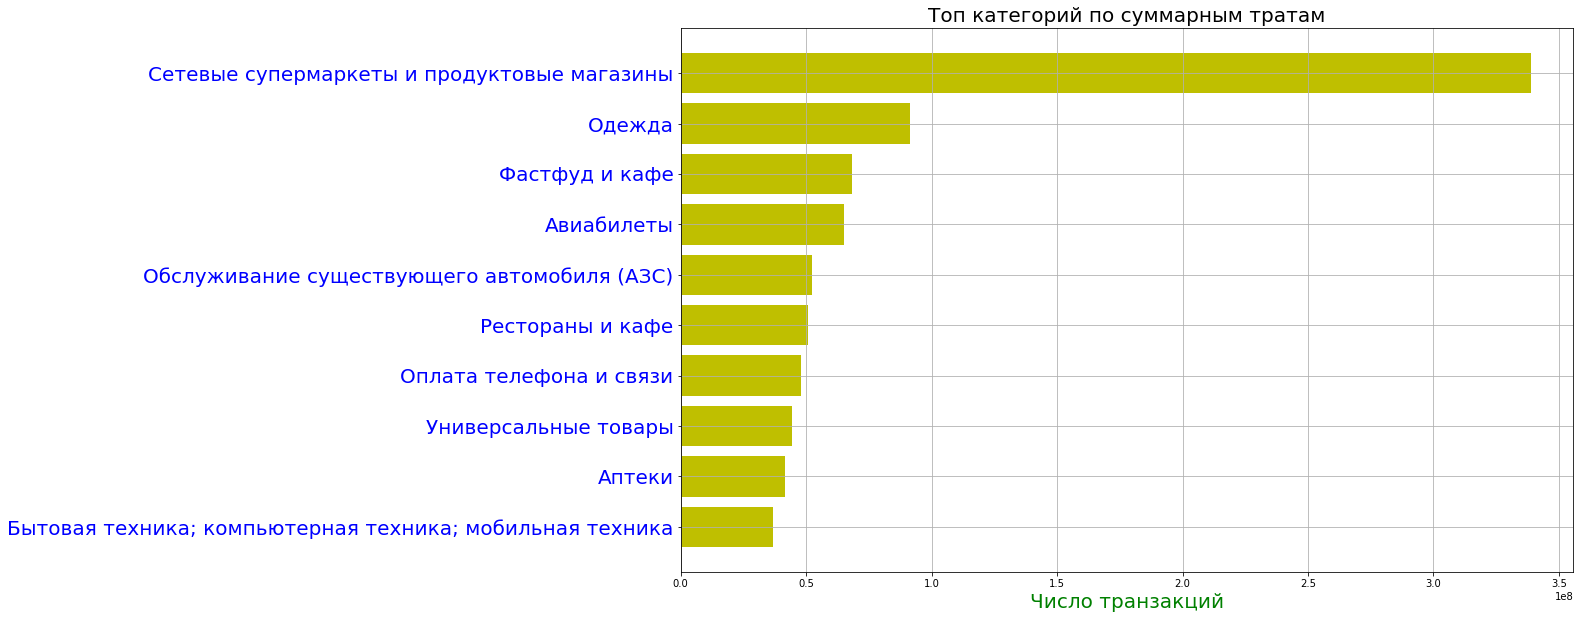

In [ ]:
# строим график ("пример" ниже)